<h1><u>Data exploration with simple linear regression predictions</u></h1>
<h3>April 2018</h3>

<h3>Exploring the data through various figures</h3>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline
warnings.filterwarnings('ignore')

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,16.386207,93.862069,62.744733
std,3.810622,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,12.482759,44.827586,36.392043
50%,17.034483,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,21.586207,187.586207,99.917173


In [ ]:
df = pd.read_csv('data/income2.csv', usecols=['Education', 'Seniority', 'Income'])
df.describe()

In [431]:
# find outliers, if any...
from pandas.api.types import is_numeric_dtype

# to add an 's' to a string 
def plurialize(nb):
    if nb > 0:
        return 's'
    return ''

column_is_numeric = [is_numeric_dtype(df[i])  for i in df.columns]
IQR = np.array((df.iloc[:,column_is_numeric].quantile(0.75) - df.iloc[:,column_is_numeric].quantile(0.25)) * 1.5)
IQR_range = pd.DataFrame()
IQR_range['low'] = df.iloc[:,column_is_numeric].quantile(0.25) - IQR
IQR_range['high'] = df.iloc[:,column_is_numeric].quantile(0.75) + IQR

preserved_rows = np.ones(df.shape[0],dtype = bool)
for i in IQR_range.index:
    preserved_rows = ((df[i]<=IQR_range.loc[i, 'high']) & preserved_rows)
    preserved_rows = ((df[i]>=IQR_range.loc[i, 'low']) & preserved_rows)
    
df_no_outlier = df[preserved_rows]
nb_outliers = preserved_rows.count() - sum(preserved_rows)    
if df[preserved_rows == False].shape[0] <= 0:
        print("The data has %d outlier%s" % (nb_outliers , plurialize(nb_outliers)))

The data has 0 outlier


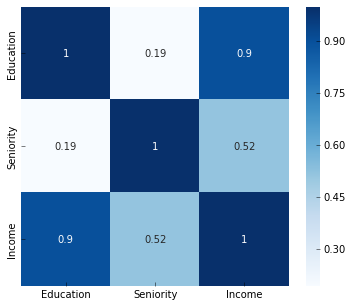

In [434]:
# looking at correlation

## Observations:
## High correlation of 0.9 between Education and Income
## Mid correlation of 0.52 between Seniority and Income
## Low correlation of 0.19 between Seniority and Education

corr = df.corr()
plt.subplots(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='Blues');

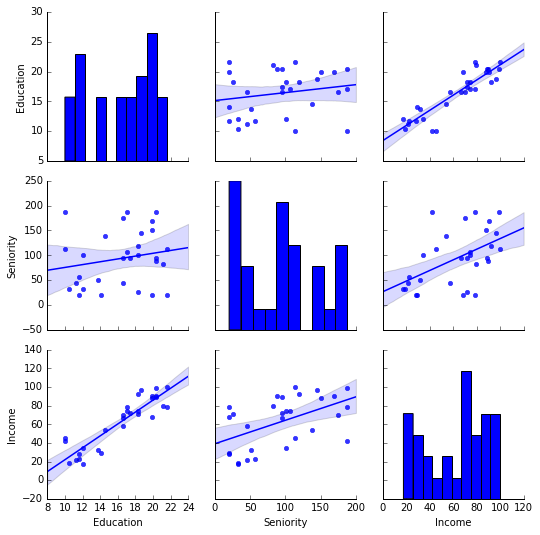

In [370]:
## Visual representation of the above, with boothstrap
## Seniority's regression (rightmost middle) has higher bias than Education's.
sns.pairplot(df, kind='reg');

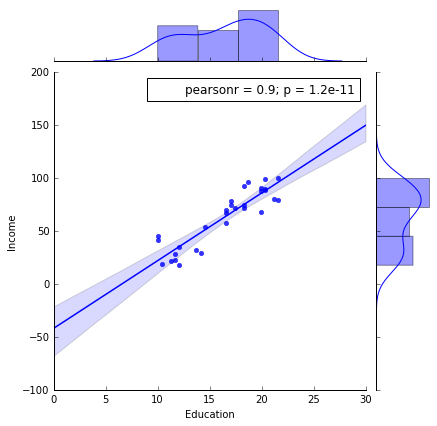

In [437]:
## Other visual representations, but with pearson r and p-value:
## Education and Income
## Correlation statistically significant with p-value << 0.05 
sns.jointplot(x='Education', y='Income', kind='reg', data=df);

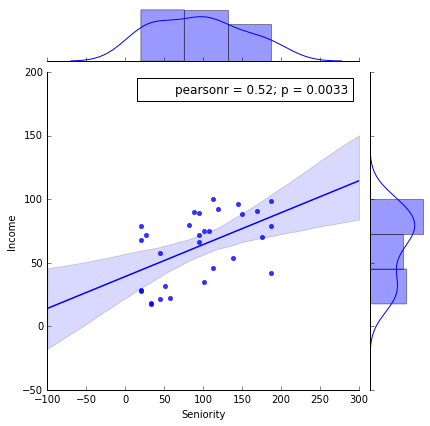

In [374]:
## Seniority and Income
## Correlation statistically significant with p-value < 0.05 
sns.jointplot(x='Seniority', y='Income', kind='reg', data=df);

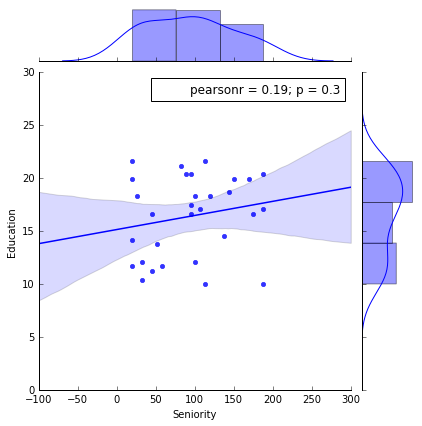

In [375]:
## Seniority and Income
## Correlation not statistically significant with p-value > 0.05
## This suggests that the features might be quite independent
sns.jointplot(x='Seniority', y='Education', kind='reg', data=df);

<h3>I predict “y = Income” as a linear function of “x = Years of Education” using simple linear regression, 
and predict Income for a new individual with “x = 18”.</h3>

We recall our observations: 
- High correlation of 0.9 between Education and Income
- Mid correlation of 0.52 between Seniority and Income
- Low correlation of 0.19 between Seniority and Education

In [51]:
# using the two models tested in class and doing the work by hand:
print('Linear Regression with sklearn:')
x = np.array([18]) 
reg = linear_model.LinearRegression()
reg.fit(df[['Education']], df.Income)
print("Education: m = ", reg.coef_, " b = ", reg.intercept_)
print("f(x=18) : ", reg.intercept_ + reg.coef_ * x)  

print('\nLinear Regression with statsmodel:')
model = smf.ols(formula = 'Income~ Education', data= df)
# ordinary least square model (ordinary = no weight)
lr = model.fit()
print("Education: m = ", lr.params[1], " b = ", lr.params[0])
print("f(x=18) : ", lr.params[0] + lr.params[1] * x)   

Linear Regression with sklearn:
Education: m =  [6.38716122]  b =  -41.916612200562774
f(x=18) :  [73.0522897]

Linear Regression with statsmodel:
Education: m =  6.387161216510141  b =  -41.91661220056268
f(x=18) :  [73.0522897]


<h3>Showing the scatter plot of Income versus Years of Education, and add the fitted line over the scatter plot.</h3>   

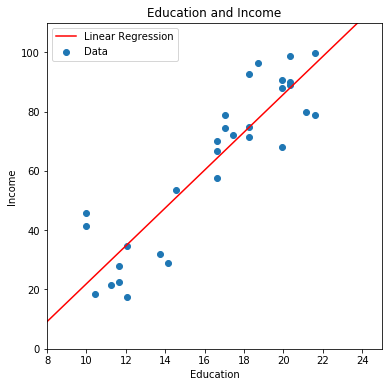

In [11]:
x_line = np.linspace(0, 24, 100)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df.Education, df.Income, marker = 'o')
plt.plot(x_line,reg.predict(x_line.reshape(-1, 1)), 'r')
ax.set_xlabel("Education")
ax.set_ylabel("Income")
ax.set_xlim(8,25)
ax.set_ylim(0,110)
ax.legend(['Linear Regression', 'Data'],loc = 2)
ax.set_title('Education and Income');


<h3>Predicting “y = Income” as a linear function of “x1 = Years of Education” and “x2 = Seniority” 
for a new individual with (x1 = 18, x2 = 60)</h3>

In [46]:
# using the two models tested in class:
x = np.array([18, 60])

print('Linear Regression with sklearn:')
reg = linear_model.LinearRegression()
reg.fit(df[ ['Education', 'Seniority']], df.Income )
print("Education & Seniority: m_edu = ", reg.coef_[0], " m_sen = ", reg.coef_[1]," b = ", reg.intercept_)
print("f(x_edu=18, x_sen=60) : ", reg.intercept_ + reg.coef_[0] * x[0] + reg.coef_[1] * x[1])   

print('\nLinear Regression with statsmodel:')
model = smf.ols(formula = 'Income~ Education + Seniority', data= df)
lr = model.fit()
print("Education & Seniority: m_educ = ", lr.params[1], " m_sen = ", lr.params[2],  " b = ", lr.params[0])
print("f(x_edu=18, x_sen=60) : ", lr.params[0] + lr.params[1] * x[0] + lr.params[2] * x[1]) 

Linear Regression with sklearn:
Education & Seniority: m_edu =  5.89555596035853  m_sen =  0.17285546927173293  b =  -50.08563873960106
f(x_edu=18, x_sen=60) :  66.40569670315647

Linear Regression with statsmodel:
Education & Seniority: m_educ =  5.895555960358523  m_sen =  0.17285546927173306  b =  -50.08563873960093
f(x_edu=18, x_sen=60) :  66.40569670315647


<h3>Which one between “Years of Education” and “Seniority” is a stronger predictor of “Income”? Why?</h3>

<ul>
    <li>Education is a better feature for prediction than Seniority, with a t-score of 16.513 vs. 7.079 for Seniority</li>
    <li>Furthermore, for every year of education, people earn 5.9 units. In contrast, for every 10 units of seniority, people earn 1.7 units </li>
</ul>

In [47]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     191.4
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           1.13e-16
Time:                        06:56:26   Log-Likelihood:                -100.15
No. Observations:                  30   AIC:                             206.3
Df Residuals:                      27   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.0856      5.999     -8.349      0.000     -62.394     -37.777
Education      5.8956      0.357     16.513      0.000       5.163       6.628
Seniority      0.1729      0.024      7.079      0.000       0.123       0.223
==============================================================================
Omnibus:                        3.352   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.672
Skew:                           0.729   Prob(JB):                        0.263
Kurtosis:                       2.892   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

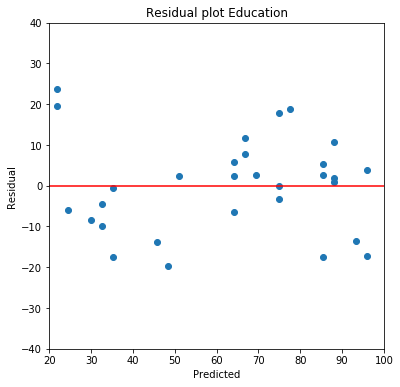

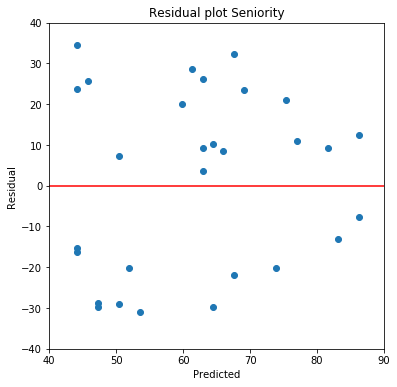

In [49]:
# looking at residuals

model = smf.ols(formula = 'Income ~ Education', data= df)
# ordinary least square model (ordinary = no weight)
lr = model.fit()

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(lr.predict(df[ ['Education']]), lr.resid)
ax.plot(np.linspace(0,100, 100), np.zeros(100), 'r')
ax.set_xlim(20,100)
ax.set_ylim(-40,40)
ax.set_xlabel('Predicted')
ax.set_ylabel('Residual')
ax.set_title('Residual plot Education');

model = smf.ols(formula = 'Income ~ Seniority', data= df)
# ordinary least square model (ordinary = no weight)
lr = model.fit()

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(lr.predict(df[ ['Seniority']]), lr.resid)
ax.plot(np.linspace(0,100, 100), np.zeros(100), 'r')
ax.set_xlim(40,90)
ax.set_ylim(-40,40)
ax.set_xlabel('Predicted')
ax.set_ylabel('Residual')
ax.set_title('Residual plot Seniority');

We observe that residuals are centered on zero throughout the range of fitted values and that there aren’t clear patterns. These plots are evenly distributed vertically, which suggests that the models are decent.

The distance from the line at y = 0 is tighter in the Education graph than in the Seniority graph, which also supports 
that Education is a better predictor than Seniority.

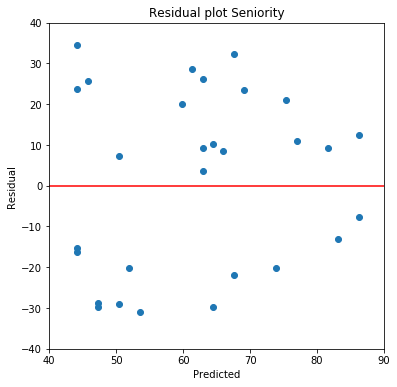

In [77]:
# Computing the residual for sckit-learn linear model 
reg = linear_model.LinearRegression()
reg.fit(df[['Seniority']], df.Income)

residual_linear_model  = df.Income - reg.predict(df[['Seniority']]) 

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(reg.predict(df[['Seniority']]), residual_linear_model)
ax.plot(np.linspace(0,100, 100), np.zeros(100), 'r')
ax.set_xlim(40,90)
ax.set_ylim(-40,40)
ax.set_xlabel('Predicted')
ax.set_ylabel('Residual')
ax.set_title('Residual plot Seniority');